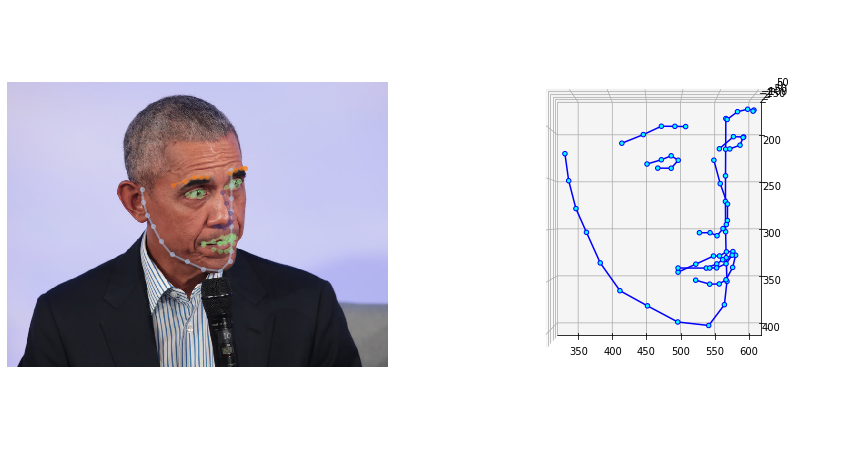

In [6]:
import face_alignment
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from skimage import io
import collections


# Run the 3D face alignment on a test image, without CUDA.
fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._3D, device='cpu', flip_input=True)

try:
    input_img = io.imread('../input/obama.jpg')
except FileNotFoundError:
    input_img = io.imread('input/obama.jpg')

preds = fa.get_landmarks(input_img)[-1]

# 2D-Plot
plot_style = dict(marker='o',
                  markersize=4,
                  linestyle='-',
                  lw=2)

pred_type = collections.namedtuple('prediction_type', ['slice', 'color'])
pred_types = {'face': pred_type(slice(0, 17), (0.682, 0.780, 0.909, 0.5)),
              'eyebrow1': pred_type(slice(17, 22), (1.0, 0.498, 0.055, 0.4)),
              'eyebrow2': pred_type(slice(22, 27), (1.0, 0.498, 0.055, 0.4)),
              'nose': pred_type(slice(27, 31), (0.345, 0.239, 0.443, 0.4)),
              'nostril': pred_type(slice(31, 36), (0.345, 0.239, 0.443, 0.4)),
              'eye1': pred_type(slice(36, 42), (0.596, 0.875, 0.541, 0.3)),
              'eye2': pred_type(slice(42, 48), (0.596, 0.875, 0.541, 0.3)),
              'lips': pred_type(slice(48, 60), (0.596, 0.875, 0.541, 0.3)),
              'teeth': pred_type(slice(60, 68), (0.596, 0.875, 0.541, 0.4))
              }

fig = plt.figure(figsize= (15, 8))
ax = fig.add_subplot(1, 2, 1)
ax.imshow(input_img)

for pred_type in pred_types.values():
    ax.plot(preds[pred_type.slice, 0],
            preds[pred_type.slice, 1],
            color=pred_type.color, **plot_style)

ax.axis('off')

# 3D-Plot
ax = fig.add_subplot(1, 2, 2, projection='3d')
surf = ax.scatter(preds[:, 0] * 1.2,
                  preds[:, 1],
                  preds[:, 2],
                  c='cyan',
                  alpha=1.0,
                  edgecolor='b')

for pred_type in pred_types.values():
    ax.plot3D(preds[pred_type.slice, 0] * 1.2,
              preds[pred_type.slice, 1],
              preds[pred_type.slice, 2], color='blue')

ax.view_init(elev=90., azim=90.)
ax.set_xlim(ax.get_xlim()[::-1])
fig.savefig('Image/obama.jpg')
plt.show()

C:\Users\Night Fury\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


[]

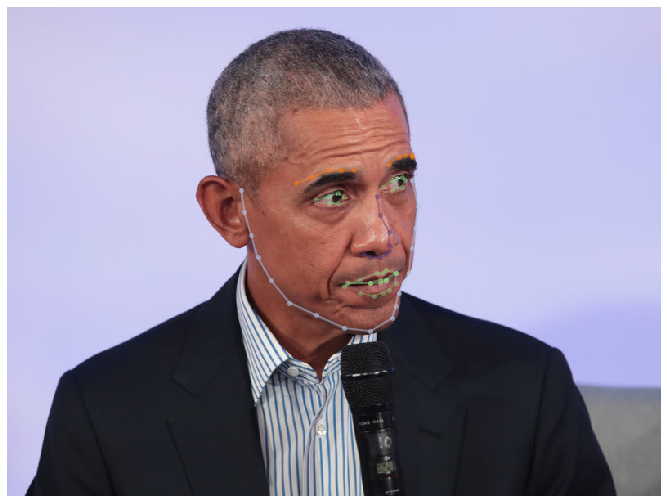

In [3]:
import face_alignment
import matplotlib.pyplot as plt
import collections
from skimage import io
from skimage.viewer import ImageViewer
import numpy as np

fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._2D, device='cpu')

image = io.imread('Input/obama.jpg')
preds = fa.get_landmarks(image)[-1]


# 2D-Plot
plot_style = dict(marker='o',
                  markersize=4,
                  linestyle='-',
                  lw=2)

pred_type = collections.namedtuple('prediction_type', ['slice', 'color'])
pred_types = {'face': pred_type(slice(0, 17), (0.682, 0.780, 0.909, 0.5)),
              'eyebrow1': pred_type(slice(17, 22), (1.0, 0.498, 0.055, 0.4)),
              'eyebrow2': pred_type(slice(22, 27), (1.0, 0.498, 0.055, 0.4)),
              'nose': pred_type(slice(27, 31), (0.345, 0.239, 0.443, 0.4)),
              'nostril': pred_type(slice(31, 36), (0.345, 0.239, 0.443, 0.4)),
              'eye1': pred_type(slice(36, 42), (0.596, 0.875, 0.541, 0.3)),
              'eye2': pred_type(slice(42, 48), (0.596, 0.875, 0.541, 0.3)),
              'lips': pred_type(slice(48, 60), (0.596, 0.875, 0.541, 0.3)),
              'teeth': pred_type(slice(60, 68), (0.596, 0.875, 0.541, 0.4))
              }

fig = plt.figure(figsize = (12, 9))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(image)

for pred_type in pred_types.values():
    ax.plot(preds[pred_type.slice, 0], preds[pred_type.slice, 1], color=pred_type.color, **plot_style)

ax.axis('off')


fig.canvas.draw()

# Now we can save it to a numpy array.
data = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')
data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))

viewer = ImageViewer(data)
viewer.show()